# Laboratorio 4 - Parte 2

### Redes Neuronales Artificiales: RNN y SOM

### 2018-II

#### Profesor: Julián D. Arias Londoño
#### julian.ariasl@udea.edu.co


In [7]:
!pip install somoclu

    100% |████████████████████████████████| 6.2MB 190kB/s ta 0:00:011
  Running setup.py bdist_wheel for somoclu ... done
  Stored in directory: /home/sofia/.cache/pip/wheels/85/3c/e5/5b1c535e93453367a8e3d35a377d3c668da00369b1a4302ad8
Successfully built somoclu
You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


## Guía del laboratorio

En esta archivo va a encontrar tanto celdas de código cómo celdas de texto con las instrucciones para desarrollar el laboratorio.

Lea atentamente las instrucciones entregadas en las celdas de texto correspondientes y proceda con la solución de las preguntas planteadas.

Nota: no olvide ir ejecutando las celdas de código de arriba hacia abajo para que no tenga errores de importación de librerías o por falta de definición de variables.

#### Primer Integrante: David Alejandro Marín Alzate
#### Segundo Integrante: Deiry Sofía Navas Muriel

In [8]:
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt
from __future__ import division

#Algunas advertencias que queremos evitar
import warnings
warnings.filterwarnings("always")

## Ejercicio 1

En este ejercicio vamos a utilizar dos bases de datos diferentes para entrenar dos mapas auto-organizables. En primer lugar usaremos la base de datos iris y posteriormente la base de datos de dígitos escritos.  Si bien en estas dos bases de datos las muestras cuentan con etiquetadas de salida, las vamos a usar para evaluar el agrupamiento que produce un SOM, es decir que no usaremos las etiquetas e intentaremos que el modelo descubra los grupos de muestras similares que hay en los datos. Tenga en cuenta el número de clases en cada una de las bases de datos para los análisis posteriores.

In [54]:
from sklearn.datasets import load_iris
data = load_iris()
X = data.data

#Definimos una lista de colores de acuerdo con las clases originales
colors = ["red"] * 50
colors.extend(["green"] * 50)
colors.extend(["yellow"] * 50)

Para el trabajo usaremos el paquete somoclu (use la instrucción pip install sumoclu), los parámetros de la función los pueden consultar en : https://somoclu.readthedocs.io/en/stable/reference.html. 

Complete el siguiente código para entrenar un SOM con los datos almacenados en la variable Xn (Datos normalizados), use una cuadrícula de neuronas de 100 por 120 y un número de épocas igual a 100. Adicionalmente use las opciones maptype="toroid" y compactsupport=False, para una mejor visualización de los resultados.

In [5]:
!pip install sumoclu

  Retrying (Retry(total=4, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ReadTimeoutError("HTTPSConnectionPool(host='pypi.org', port=443): Read timed out. (read timeout=15)",)': /simple/sumoclu/
  Retrying (Retry(total=3, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<pip._vendor.urllib3.connection.VerifiedHTTPSConnection object at 0x7fe3a287ceb8>: Failed to establish a new connection: [Errno -3] Fallo temporal en la resolución del nombre',)': /simple/sumoclu/
  Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<pip._vendor.urllib3.connection.VerifiedHTTPSConnection object at 0x7fe3a287c908>: Failed to establish a new connection: [Errno -3] Fallo temporal en la resolución del nombre',)': /simple/sumoclu/
  Could not find a version that satisfies the requirement sumoclu (from versions: )
No matching distribution found fo

In [55]:
from numpy import random
import somoclu
from sklearn.preprocessing import StandardScaler
random.seed(19680801)
scaler = StandardScaler()
Xn = scaler.fit_transform(X)
Xn_shape = np.float32(Xn)
data = np.float32(Xn)
print(type(data))


<class 'numpy.ndarray'>


In [72]:

som = somoclu.Somoclu(n_columns=100, n_rows=120, maptype="toroid",compactsupport=False)
som.train(data=data, epochs=100)

Una vez entrenado el modelo ejecute la siguiente celda, la cuál grafica la matriz U extraída del SOM:

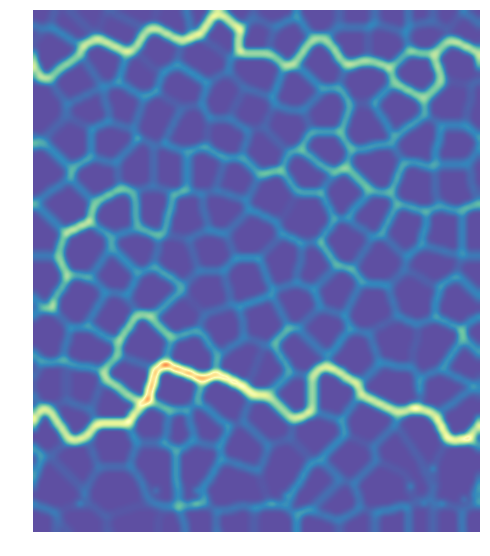

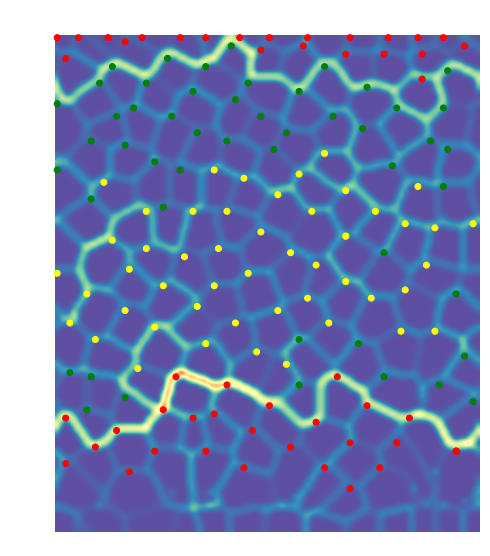

<module 'matplotlib.pyplot' from '/home/sofia/simulacion/lib/python3.5/site-packages/matplotlib/pyplot.py'>

In [56]:
som.view_umatrix()
som.view_umatrix(bestmatches=True, bestmatchcolors=colors)


Responda:

1.1 ¿Qué es la matrix U (En inglés U-matrix) de un SOM?

*Rta:* La matriz U es una representación visual de un mapa auto-organizable (SOM) donde asigna un color de acuerdo a las distancias euclidianas que hay con las neuronas vecinas.  Esto permite visualizar los clusters del mapa auto-organizable.

1.2 ¿Cómo se pueden interpretar las gráficas obtenidas en el punto anterior? Describa detalladamente lo que observa e interprételo de acuerdo con la definición que dio en el punto 1.1

*Rta:*  Sabemos que está base de datos cuenta con 3 clases (Setosa, Versicolour y Virginica), por tanto una matriz U debería mostrarnos 3 clusters en función de las distancias euclidianas con las neuronas vecinas. En la primera gráfica se observa que existe una intensidad de color muy fuerte de color blanco, lo que señala  que hay distancia muy cortas entre las muestras y puede pertenecer al mismo cluster, se podría interpretar como la "frontera" de los clusters. En la segunda gráfica, se corrobora que la intensidad de color blanco indica una similitud muy fuerte entre ellas, como en el caso de las muestras rojas de la parte inferior que no hay duda de su vecindad cercana. 

Ejecute la siguiente instrucción:

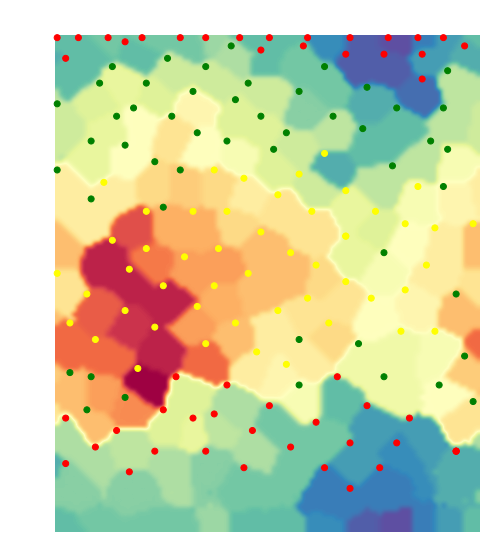

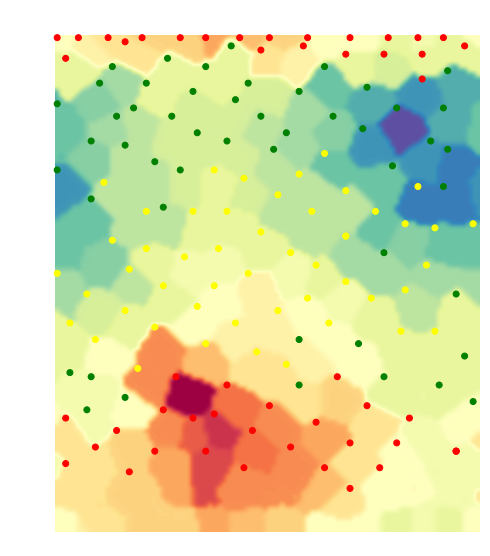

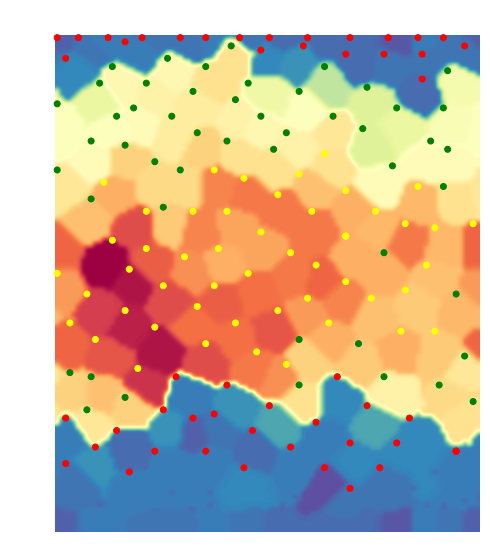

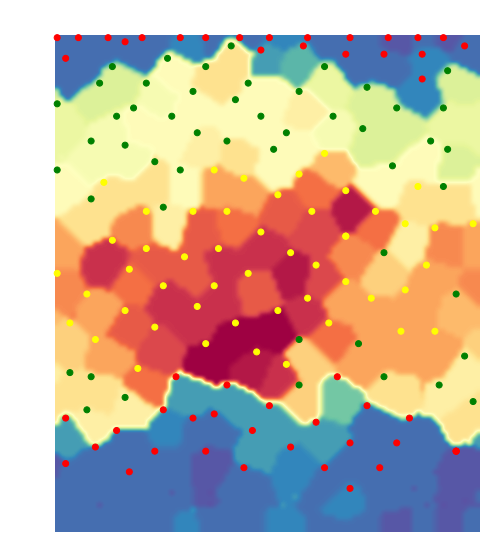

<module 'matplotlib.pyplot' from '/home/sofia/simulacion/lib/python3.5/site-packages/matplotlib/pyplot.py'>

In [58]:
som.view_component_planes(bestmatches=True,bestmatchcolors=colors)

Responda:

1.3 ¿Qué se está gráficando en las figuras? 

*Rta:* Al gráficar los componente planos del SOM, hace referencia  a los vectores de cada neurona, conocido como codebook.

1.4 ¿Qué utilidad tienen las gráficas anteriores?

*Rta:* Permite ver la distribuición de los vector x neurona "codebook"

1.5 ¿De acuerdo con las gráficas anteriores cuáles variables en el problema están correlacionadas?

In [73]:
print("Dimensión codebook ",som.codebook.shape)

Dimensión codebook  (120, 100, 39)


## Ejercicio 2

Repita el proceso anterior para los datos del problema de reconocimiento de dígitos escritos a mano. Ejecute la siguiente celda para cargar los datos

In [59]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
digits = load_digits(n_class=4)

#--------- preprocesamiento--------------------
pca = PCA(0.99, whiten=True)
data = pca.fit_transform(digits.data)

#---------- Datos a usar ----------------------
X = data
Y = digits.target

#Definimos una lista de colores de acuerdo con las clases en Y
color = []
for i in range(len(Y)):
    if Y[i] == 0:
        color.append('red')
    elif Y[i] == 1:
        color.append('blue')
    elif Y[i] == 2:
        color.append('green')
    elif Y[i] == 3:
        color.append('yellow')

/home/sofia/simulacion/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/sofia/simulacion/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/sofia/simulacion/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/sofia/simulacion/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/sofia/simulacion/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/sofia/simulacion/lib/python3.5/importli

Entrene un SOM a partir de los datos cargados en la celda anterior. En este caso utilice un SOM con una capa de neuronas de dimension 150 por 150.

In [75]:
random.seed(19680801)
scaler = StandardScaler()
Xn = scaler.fit_transform(X);

data = np.float32(Xn)

som_2 = somoclu.Somoclu(n_columns=150, n_rows=150,)
som_2.train(data=data, epochs=100)


Una vez entrenado el SOM, ejecute la siguiente celda

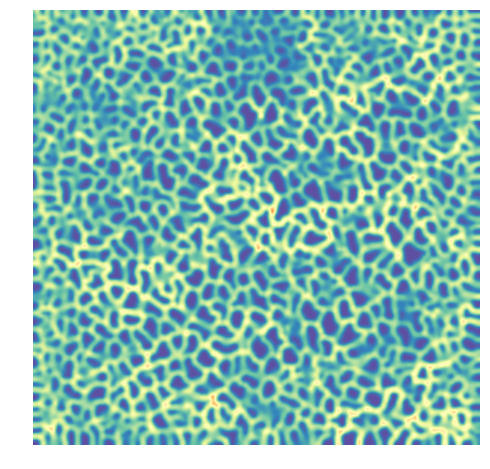

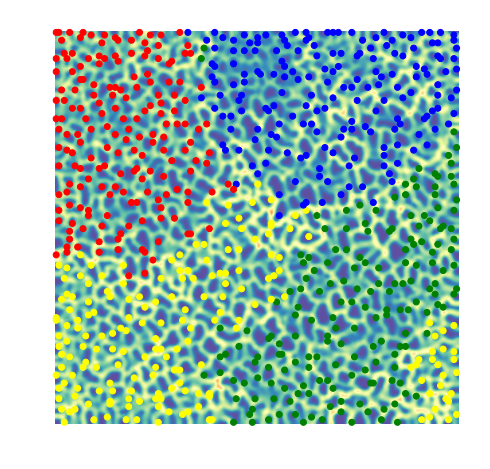

<module 'matplotlib.pyplot' from '/home/sofia/simulacion/lib/python3.5/site-packages/matplotlib/pyplot.py'>

In [76]:
som_2.view_umatrix()
som_2.view_umatrix(bestmatches=True, bestmatchcolors=color)

Responda:

2.1 ¿Qué diferencia observa entre la matrix U en este caso vs el anterior?

*Rta:*  Las dimensiones del mapa con la base de datos de digitos (150x150) es más grande que el anterior (100x120), lo que resulta un mapa más grande con más capacidad de neuronas. Además se tiene una clase más que el anterior, por tanto varía el número de clusters.

2.2 ¿Qué puede concluir a partir de la gráfica que incluye la ubicación de las neuronas ganadoras para cada muestra de entrada?

*Rta:* El conjunto de datos de entrenamiento cuenta con 720 muestras de entrada y 39 carácteristicas, sabemos que sólo utilizamos 4 clases a clasificar, por tanto se esperaría 4 cluster en el mapa. Entonces de la gráfica tenemos 150 neuronas ganadoras lo que se conoce como los vectores "codebook" y su distribución con respecto a las muestras de entrada es acorde a su clusters y se resaltan las más relevantes para la evaluación de la vecindad de las muestras-

In [78]:
print("Dimensión datos de entrenamiento",data.shape)
print("Dimensión codebook ",som_2.codebook.shape)

Dimensión datos de entrenamiento (720, 39)
Dimensión codebook  (150, 150, 39)


## Ejercicio 3

En este ejercicio entrenaremos una Red Neuronal Recurrente para la predicción de una serie de tiempo. Este problema corresponde a una configuración many-to-many. En este caso usaremos una serie de tiempo que corresponde al número de pasajeros internacionales por mes, desde el año 1949 hasta el año 1960. La serie de tiempo puede ser consultada en: https://datamarket.com/data/set/22u3/international-airline-passengers-monthly-totals-in-thousands-jan-49-dec-60#!ds=22u3&display=line 

In [82]:
!pip install neurolab

You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


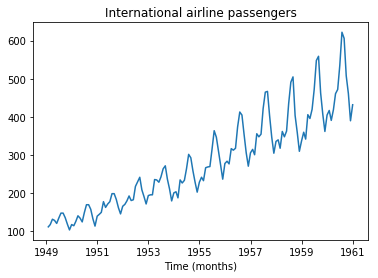

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('DB/international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
#---- Tiempos para los datos originales---
date_begin = np.datetime64('1949-01')
date_end = np.datetime64('1961-01')
Time = pd.date_range(date_begin, date_end, freq='M')

plt.plot(Time,dataset)
plt.title('International airline passengers')
plt.xlabel('Time (months)')
plt.show()

El paquete que usaremos en este caso para el entrenamiento de redes neuronales recurrentes es neurolab (use la instrucción pip install neurolab), la documentación puede ser consultada en : https://pythonhosted.org/neurolab/.

In [84]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

#Mean Absolute Percentage Error para los problemas de regresión
def MAPE(Y_est,Y):
    N = np.size(Y)
    mape = np.sum(abs((Y_est.reshape(N,1) - Y.reshape(N,1))/Y.reshape(N,1)))/N
    return mape 

3.1 Complete el código siguiente y entrene una red neuronal recurrente de Elman, con una capa oculta y una capa de salida. Use función de activación tangente hiperbólica para la capa oculta y lineal para la capa de salida. Use un número de épocas igual a 1000, y un objetivo de error inferior a 0.00001. Inicialice los pesos de las capas aleatoriamente entre [-0.1, 0.1].

In [87]:
import neurolab as nl
from sklearn.preprocessing import MinMaxScaler
def mainElman(delay=1,num_neurones=5):
    random.seed(19680801)
    dataset = pd.read_csv('DB/international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
    # normalize the dataset
    scaler = MinMaxScaler(feature_range=(0, 1))
    dataset = scaler.fit_transform(dataset)
    # split into train and test sets
    train_size = int(len(dataset) * 0.7)
    test_size = len(dataset) - train_size
    train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

    # reshape into X=t-look_back+1:t and Y=t+1
    look_back = delay # Retardos de tiempo por muestra
    trainX, trainY = create_dataset(train, look_back)
    testX, testY = create_dataset(test, look_back)

    #Esta variable se requiere para definir la red de acuerdo con la librería neurolab. Define el número de entradas y el rango de valores que toma cada entrada
    layers = []
    for i in range(look_back):
        layers.append([0, 1])

    # Crear la red e inicializar los pesos. 
    net = nl.net.newelm(layers,[num_neurones,1],[nl.trans.TanSig(), nl.trans.PureLin()])

    net.layers[0].initf = nl.init.InitRand([-0.1, 0.1], 'wb')
    net.layers[1].initf= nl.init.InitRand([-0.1, 0.1], 'wb')
    net.init()
    # Entrenar la red con los datos de entrenamiento
    net.train(trainX, trainY.reshape(trainX.shape[0],1), epochs=1000, goal=0.00001)
    # Evaluar la red con los datos de test
    output = net.sim(testX)

    # Calculo de error
    Error = MAPE(output,testY)

    return Error
Error = mainElman()
print('MAPE = ' + str(np.mean(Error)))

Epoch: 100; Error: 0.018288540656380397;
Epoch: 200; Error: 0.0024964411953478163;
Epoch: 300; Error: 0.0020820334814228153;
Epoch: 400; Error: 0.001930556768793353;
Epoch: 500; Error: 0.0019225934979861348;
Epoch: 600; Error: 0.0019158144400718503;
Epoch: 700; Error: 0.0019195792919242541;
Epoch: 800; Error: 0.0018952435289607923;
Epoch: 900; Error: 0.002090491939305284;
Epoch: 1000; Error: 0.0018801243847247878;
The maximum number of train epochs is reached
MAPE = 0.12473276507035648


3.1 Haga una gráfica de la salida real vs la mejor predicción hecha por la red. Recuerde incluir los tiempos apropiados en el eje x y usar el método plt.legend() para identificar cuál es la serie real y cual la predicción.

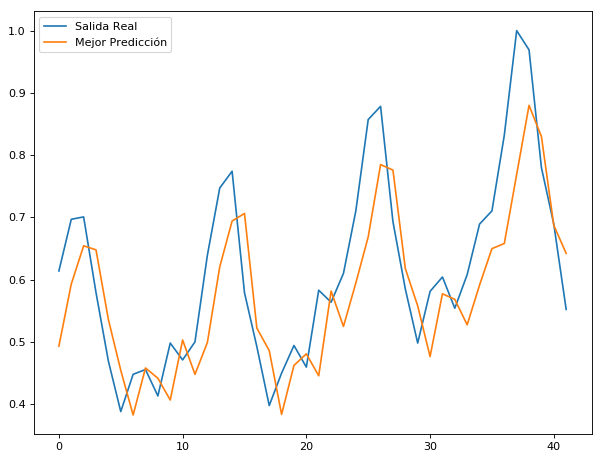

In [91]:
# Gráfica
plt.figure(num=None, figsize=(9, 7), dpi=80, facecolor='w', edgecolor='k')
plt.plot(testY)
plt.plot(output)
plt.xlabel('')
plt.ylabel('')
plt.legend(['Salida Real', 'Mejor Predicción'])

3.2 Una vez compoletado el código realice los experimentos necesarios para llenar la siguiente tabla: 

In [92]:
delayes = [1,1,1,1,1,1,2,2,2,2,2,2,3,3,3,3,3,3,4,4,4,4,4,4]
nuerons_per_layer = [5,10,15,20,25,30,5,10,15,20,25,30,5,10,15,20,25,30,5,10,15,20,25,30]
errors = np.zeros(len(delayes))
for i in range(0,len(delayes)):
    errors[i] = mainElman(delay=delayes[i],num_neurones=nuerons_per_layer[i])

Epoch: 100; Error: 0.018288540656380397;
Epoch: 200; Error: 0.0024964411953478163;
Epoch: 300; Error: 0.0020820334814228153;
Epoch: 400; Error: 0.001930556768793353;
Epoch: 500; Error: 0.0019225934979861348;
Epoch: 600; Error: 0.0019158144400718503;
Epoch: 700; Error: 0.0019195792919242541;
Epoch: 800; Error: 0.0018952435289607923;
Epoch: 900; Error: 0.002090491939305284;
Epoch: 1000; Error: 0.0018801243847247878;
The maximum number of train epochs is reached
Epoch: 100; Error: 0.01826861312510988;
Epoch: 200; Error: 0.0021689060049152453;
Epoch: 300; Error: 0.0019420138335285676;
Epoch: 400; Error: 0.0020069883031246924;
Epoch: 500; Error: 0.0019172376575234786;
Epoch: 600; Error: 0.0019057218336536721;
Epoch: 700; Error: 0.002001203236648856;
Epoch: 800; Error: 0.0019018304746997133;
Epoch: 900; Error: 0.0018773480404277712;
Epoch: 1000; Error: 0.0018943906077310045;
The maximum number of train epochs is reached
Epoch: 100; Error: 0.017492197747412022;
Epoch: 200; Error: 0.0022205466

Epoch: 900; Error: 0.0018235809878054659;
Epoch: 1000; Error: 0.0018158607476547975;
The maximum number of train epochs is reached
Epoch: 100; Error: 0.003527858231442971;
Epoch: 200; Error: 0.002090412713185191;
Epoch: 300; Error: 0.001891654112945138;
Epoch: 400; Error: 0.0018223853525464427;
Epoch: 500; Error: 0.001752540185731974;
Epoch: 600; Error: 0.001733719940795966;
Epoch: 700; Error: 0.0018468339522167822;
Epoch: 800; Error: 0.0017107706911493117;
Epoch: 900; Error: 0.0016975325623522074;
Epoch: 1000; Error: 0.0016928942358341826;
The maximum number of train epochs is reached
Epoch: 100; Error: 0.01337115733672686;
Epoch: 200; Error: 0.0023958665399232983;
Epoch: 300; Error: 0.002048852450937254;
Epoch: 400; Error: 0.001947640525693834;
Epoch: 500; Error: 0.0020244989510740615;
Epoch: 600; Error: 0.0018260490123839586;
Epoch: 700; Error: 0.0018271781676311336;
Epoch: 800; Error: 0.0019373623005141275;
Epoch: 900; Error: 0.0017463735840101084;
Epoch: 1000; Error: 0.00181507014

In [93]:
import pandas as pd
import qgrid
df_types = pd.DataFrame({
    'Retardos de tiempo por muestra' : pd.Series([1,1,1,1,1,1,2,2,2,2,2,2,3,3,3,3,3,3,4,4,4,4,4,4]),
    'Neuronas por capa' : pd.Series([5,10,15,20,25,30,5,10,15,20,25,30,5,10,15,20,25,30,5,10,15,20,25,30])})
df_types["MAPE"] = errors
df_types.set_index(['Retardos de tiempo por muestra','Neuronas por capa'], inplace=True)
#df_types.sort_index(inplace=True)
qgrid_widget = qgrid.show_grid(df_types, show_toolbar=False)
qgrid_widget

/home/sofia/simulacion/lib/python3.5/site-packages/ipywidgets/widgets/widget.py:281: DeprecationWarning: Widget registration using a string name has been deprecated. Widget registration now uses a plain `@register` decorator.
  warnings.warn("Widget registration using a string name has been deprecated. Widget registration now uses a plain `@register` decorator.", DeprecationWarning)
/home/sofia/simulacion/lib/python3.5/site-packages/qgrid/grid.py:573: DeprecationWarning: metadata {'sync': True} was set from the constructor. With traitlets 4.1, metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  _df_json = Unicode('', sync=True)
/home/sofia/simulacion/lib/python3.5/site-packages/qgrid/grid.py:833: DeprecationWarning: QgridWidget._precision_changed is deprecated in traitlets 4.1: use @observe and @unobserve instead.
  def _precision_changed(self):


QgridWidget(grid_options={'enableTextSelectionOnCells': True, 'explicitInitialization': True, 'sortable': True…

Ejecute la siguiente instrucción para dejar guardados en el notebook los resultados de las pruebas.

In [94]:
qgrid_widget.get_changed_df()

MAPE
Retardos de tiempo por muestra Neuronas por capa          
1                              5                  0.124733
                               10                 0.123874
                               15                 0.124940
                               20                 0.126315
                               25                 0.125997
                               30                 0.126097
2                              5                  0.121453
                               10                 0.126969
                               15                 0.117812
                               20                 0.116953
                               25                 0.117388
                               30                 0.123486
3                              5                  0.121055
                               10                 0.120968
                               15                 0.114075
                               20                 0.112970
                               25                 0.114495
                               30                 0.116749
4                              5                  0.124757
                               10                 0.125920
                               15                 0.125934
                               20                 0.130758
                               25                 0.123819
                               30                 0.127871

Responda:

3.3 ¿Cuál fue la mejor configuración encontrada?


*Rta:*  La mejor configuración encontrada es la que tiene retardo por muestra de 3 y 20 neuronas en la capa ocualta, devido a que el error en la validacion es la menor en toda la tabla

3.4 ¿Porqué seguir aumentando los tiempos de retardo no implica siempre una mejora en la predicción del modelo?

*Rta:* Porque llega a su limite de convergencia.

## *Ejercicio 4

Este ejercicio es opcional. Use una red neuronal tipo MLP para reolver el mismo problema de predicción del número de pasajeros y compare el resultado con el obtenido usando la red recurrente.